In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-2.54122065, -2.02930318],
       [-2.06559971, -1.13024812],
       [-1.22933997, -0.75002794],
       ...,
       [-2.69653347,  2.68462123],
       [-0.88970383, -0.56324678],
       [ 8.79004149, -1.75770606]])

In [5]:
y

array([2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1,
       2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1,
       0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0,

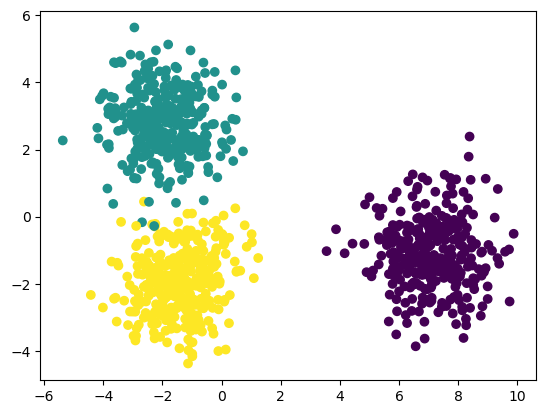

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
wcss

[1340.0000000000002,
 643.7685712879893,
 157.5740013063533,
 130.7659801037899,
 102.4512508832752,
 77.29638356095961,
 70.30340747470846,
 64.0598441373051,
 59.603017697427,
 53.72211645537845]

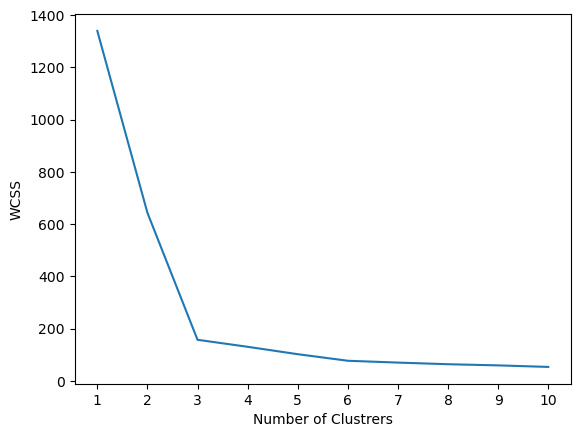

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0,
       1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2,
       1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2,
       0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2,
       1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1,
       2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1,

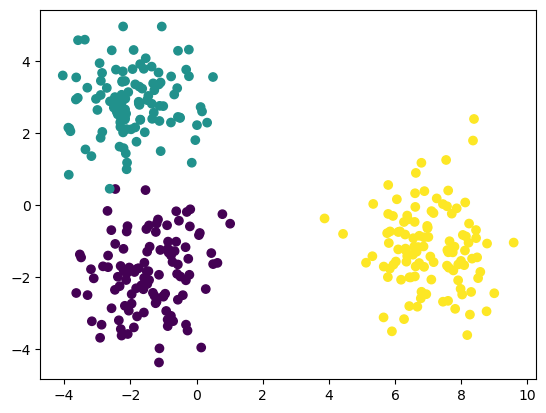

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
## Validating the k value
## 1)kneelocator
## 2)Silhoutee scoring

In [21]:
## kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [24]:
kl.elbow

3

In [25]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\raksh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [27]:
silhouette_coefficients

[0.5385401129827144,
 0.7002683907408461,
 0.5976252414942164,
 0.4902152015149158,
 0.4217518975583221,
 0.46426895358250875,
 0.3702507373940944,
 0.34152616326273955,
 0.35540588205386237]

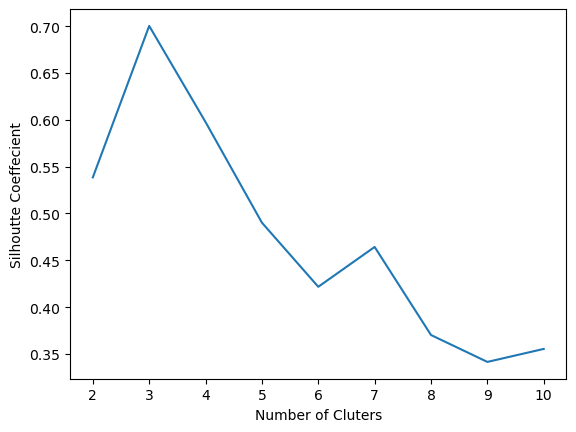

In [28]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()